<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

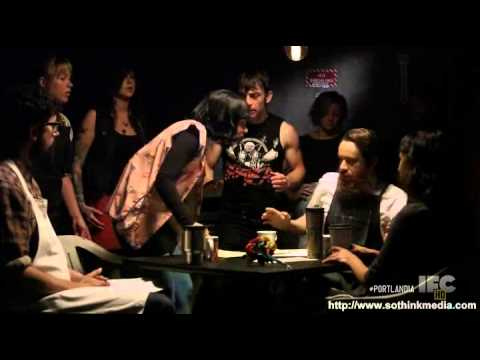

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/home/antony/Lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [4]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
shops.shape

(7616, 3)

In [6]:
shops['review_date'] = shops['full_review_text'].apply(lambda review: re.search('(?:[0-9]+/){2}[0-9]{4}', review)[0])
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016


In [7]:
shops['coffee_shop_name'].describe()

count              7616
unique               79
top       Epoch Coffee 
freq                400
Name: coffee_shop_name, dtype: object

In [8]:
shops['full_review_text'] = shops['full_review_text'].apply(lambda review: re.sub('(?:[0-9]+/){2}[0-9]{4}','', review))
shops['full_review_text'] = shops['full_review_text'].str.lstrip('1 check-in/')
shops['full_review_text'] = shops['full_review_text'].str.strip()
shops['full_review_text'] = shops['full_review_text'].apply(lambda review: re.sub('[;.(),!?:""]', '', review))
shops['full_review_text'] = shops['full_review_text'].apply(lambda x: x.lower())
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0 star rating,12/3/2016


In [9]:
shops['star_rating'] = shops.star_rating.str.split().str.get(0)
shops['star_rating'] = shops['star_rating'].astype(float)
shops['review_date'] = pd.to_datetime(shops['review_date'])
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5.0,2016-11-25
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4.0,2016-12-02
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0,2016-11-30
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0,2016-11-25
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0,2016-12-03


In [10]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coffee_shop_name  7616 non-null   object        
 1   full_review_text  7616 non-null   object        
 2   star_rating       7616 non-null   float64       
 3   review_date       7616 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 238.1+ KB


In [11]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place'])

In [13]:
tokenizer = Tokenizer(nlp.vocab)
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=1000):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (len(token.text.strip())>0):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

shops['tokens'] = tokens

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [14]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,tokens
0,The Factory - Cafe With a Soul,love love loved the atmosphere every corner of...,5.0,2016-11-25,"[love, love, love, atmosphere, corner, shop, s..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4.0,2016-12-02,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4.0,2016-11-30,"[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howe...,2.0,2016-11-25,"[cool, decor, good, drink, nice, seat, overpri..."
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4.0,2016-12-03,"[locate, northcross, mall, shop, center, face,..."


In [15]:
shops_good = shops[shops['star_rating'] >= 4]
shops_bad = shops[shops['star_rating'] < 4]

In [16]:
def count(docs):
    """
    Calculates some basic statistics about tokens in our corpus 
    (i.e. corpus means collections text data)
    """

    word_counts = Counter()
    appears_in = Counter()
        
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [17]:
wc_good = count(shops_good['tokens'])
wc_bad = count(shops_bad['tokens'])

In [18]:
wc_good

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
101,great,2501,3466,1.0,0.012622,0.012622,0.407329
177,good,2275,3230,2.0,0.011762,0.024384,0.370521
192,it's,1662,2531,3.0,0.009217,0.033601,0.270684
187,like,1672,2422,4.0,0.008820,0.042420,0.272313
31,love,1608,2120,5.0,0.007720,0.050140,0.261889
...,...,...,...,...,...,...,...
15220,predictably,1,1,15222.0,0.000004,0.999985,0.000163
15221,blts,1,1,15223.0,0.000004,0.999989,0.000163
15223,actuality,1,1,15224.0,0.000004,0.999993,0.000163
15222,crass,1,1,15225.0,0.000004,0.999996,0.000163


In [19]:
wc_bad

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,like,594,940,1.0,0.012042,0.012042,0.402439
17,good,602,905,2.0,0.011594,0.023637,0.407859
36,order,442,778,3.0,0.009967,0.033604,0.299458
73,come,452,650,4.0,0.008327,0.041931,0.306233
186,it's,417,629,5.0,0.008058,0.049989,0.282520
...,...,...,...,...,...,...,...
7695,vibrant,1,1,7693.0,0.000013,0.999949,0.000678
7689,atop,1,1,7694.0,0.000013,0.999962,0.000678
7691,dull,1,1,7695.0,0.000013,0.999974,0.000678
7690,imo,1,1,7696.0,0.000013,0.999987,0.000678


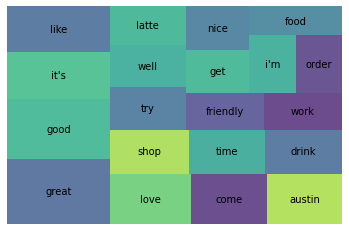

In [20]:
wc_good_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_good_top20['pct_total'], label=wc_good_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

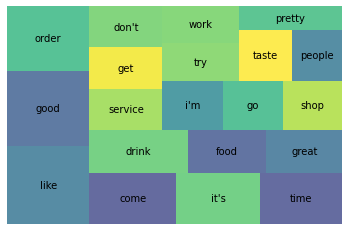

In [21]:
wc_bad_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_bad_top20['pct_total'], label=wc_bad_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

